<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_8_An%C3%A1lisis_de_un_Dataset_con_Seaborn_y_Visualizaci%C3%B3n_Avanzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns

Mounted at /content/drive


In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


<Axes: >

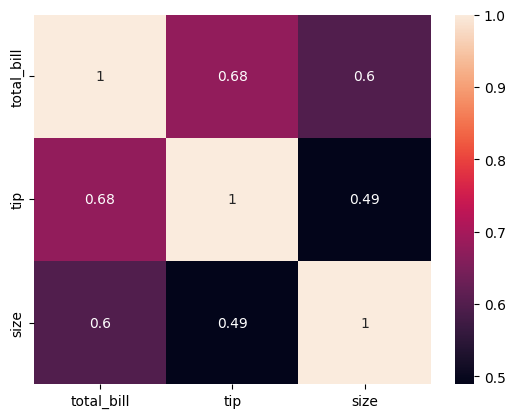

In [ ]:
correlation_matrix = df[['total_bill', 'tip','size']].corr()

sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='day', ylabel='total_bill'>

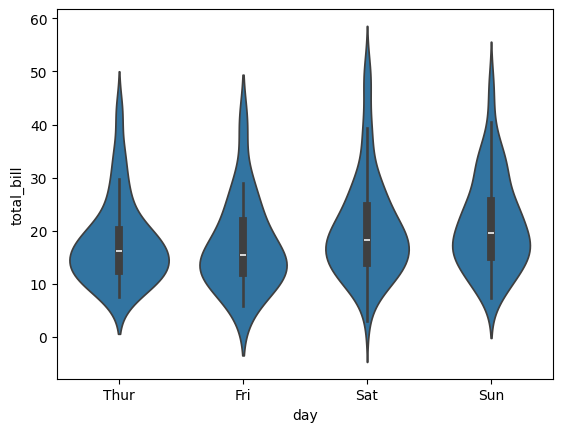

In [10]:
sns.violinplot(x='day', y='total_bill', data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

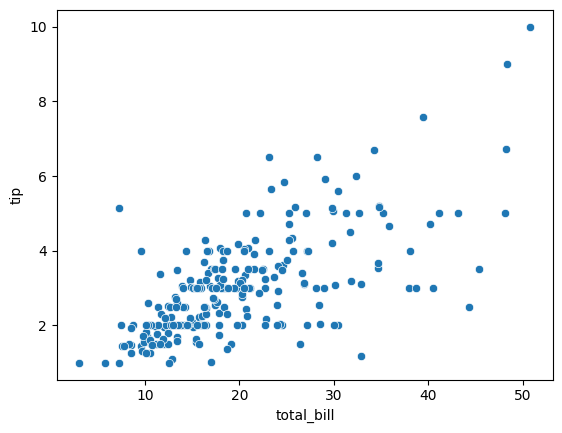

In [11]:
sns.scatterplot(x='total_bill', y='tip', data=df)

<ipython-input-18-d9d3231a7bf0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio = df.groupby('sex')['tip'].mean().reset_index()


<Axes: xlabel='sex', ylabel='tip'>

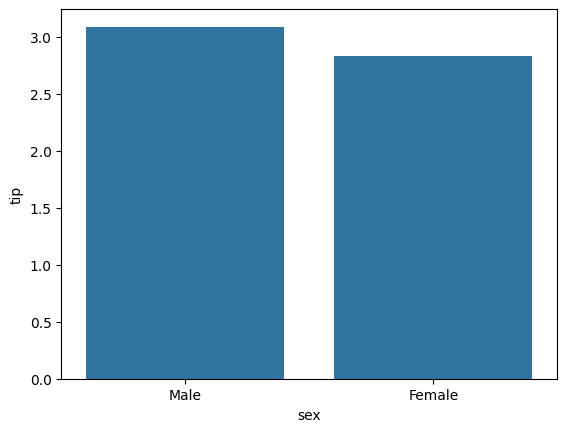

In [18]:
promedio = df.groupby('sex')['tip'].mean().reset_index()

sns.barplot(x='sex', y='tip', data=promedio)